In [1]:
import numpy as np
import pandas as pd
from pandas.api.types import is_numeric_dtype
import math
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [2]:
def split_df_by(this_df, include_dtypes:[list]=["int","float"]):
    # __author__ = "Roman Kaltschew"
    """takes in this_df, splits it into two NEW DF's by dtype of columns (default ["int","float"]) 
       and returns tuple (incl_df, excl_df)"""
    incl_lst = [_ for _ in this_df.select_dtypes(include=include_dtypes).dtypes.index]
    excl_lst = [_ for _ in this_df.select_dtypes(exclude=include_dtypes).dtypes.index]
    return (this_df[incl_lst], this_df[excl_lst])

In [3]:
def split_column_names_by(this_df, include_dtypes:[list]=["int","float"]):
    # __author__ = "Roman Kaltschew"
    """takes in this_df, splits this_df's columns into two lists of column name by dtype of columns (default ["int","float"]) 
       and returns tuple (incl_lst, excl_lst)"""
    incl_lst = [_ for _ in this_df.select_dtypes(include=include_dtypes).dtypes.index]
    excl_lst = [_ for _ in this_df.select_dtypes(exclude=include_dtypes).dtypes.index]
    return (incl_lst, excl_lst)

In [4]:
def count_plot_w_hue(this_df, this_x: [str] = None, this_hue: [str] = None, x_bins: [int] = 4, hue_bins: [int] = 4,
                     palette: [str] = "YlOrRd", figsize: [tuple] = (10, 8), legend_loc: [str] = "upper right",
                     rotate_xlabels: [int] = None, show_plot: [bool] = True, save_to: [str] = None):
    # __author__ = "Roman Kaltschew"
    """creates count_plot of this_x with optional this_hue of this_df, if either column is numerical, evenly spread 
       bins according value of x_bins or hue_bins will be created. Takes values for figsize, legend_loc and palette 
       according to seaborn library, save_to takes filepath and saves accordingly, provide rotate_xlabels if needed.
       Catches empty df, wrong values for this_x and this_hue with error message. 
       x_bins or hue_bins will be set to 1 if < 1."""

    if this_df is None:
        return "DataFrame is empty"

    # prepare data
    if x_bins < 1:
        x_bins = 1
    if hue_bins < 1:
        hue_bins = 1

    if this_x in split_column_names_by(this_df)[0]:     # this_x is numerical
        bin_limits = np.linspace(np.min(this_df[this_x]), np.max(this_df[this_x]), x_bins + 1)
        bin_labels = [f" ≤ {_}" for _ in np.round(bin_limits, 2)[1:len(bin_limits)]]
        x_ser = pd.cut(this_df[this_x], bins=bin_limits, labels=bin_labels)
    elif this_x in split_column_names_by(this_df)[1]:   # this_x is categorical
        x_ser = this_df[this_x].sort_values()
    else:
        return "check this_x value"

    if this_hue:    # evaluate only if provided
        if this_hue in split_column_names_by(this_df)[0]:  # this_y is numerical
            bin_limits = np.linspace(np.min(this_df[this_hue]), np.max(this_df[this_hue]), hue_bins + 1)
            bin_labels = [f" ≤ {_}" for _ in np.round(bin_limits, 2)[1:len(bin_limits)]]
            hue_ser = pd.cut(this_df[this_hue], bins=bin_limits, labels=bin_labels)
        elif this_hue in split_column_names_by(this_df)[1]:  # this_y is categorical
            hue_ser = this_df[this_hue].sort_values()
        else:
            return "check this_hue value"
        title_text = f"{this_x.capitalize().replace('_', ' ')} by {this_hue.capitalize().replace('_', ' ')}"
    else:                          # ↳ reformat column names, 1st letter uppercase and _ replaced by space                           
        hue_ser = None  
        title_text = f"{this_x.capitalize().replace('_', ' ')}"
    
    # plot
    fig, ax = plt.subplots(figsize=figsize)
    sns.countplot(x=x_ser, y=None, hue=hue_ser, palette=palette)
    ax.set_title(title_text, size="18", fontweight="bold")  
    ax.set_xlabel(f"{this_x.capitalize().replace('_', ' ')}")   # reformat column name
    if rotate_xlabels:     # avoid overlapping
        plt.xticks(rotation=rotate_xlabels)
    if this_hue:      # legend is only needed, if hue was given
        plt.legend(loc=legend_loc)
    if save_to:
        plt.savefig(save_to)
    if show_plot:
        plt.show()

In [5]:
raw_df = pd.read_csv("C:/Users/roman/Documents/GitHub/Customer_Data_Analysis/Data/Data_Marketing_Customer_Analysis_Round2.csv")

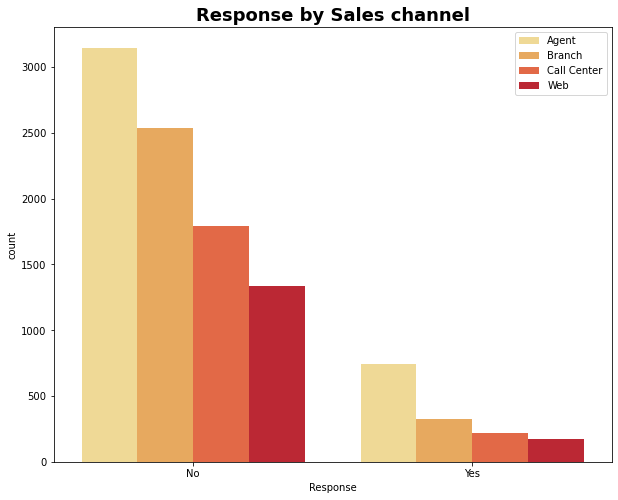

In [6]:
count_plot_w_hue(raw_df, "Response", "Sales Channel")       # cat hue cat

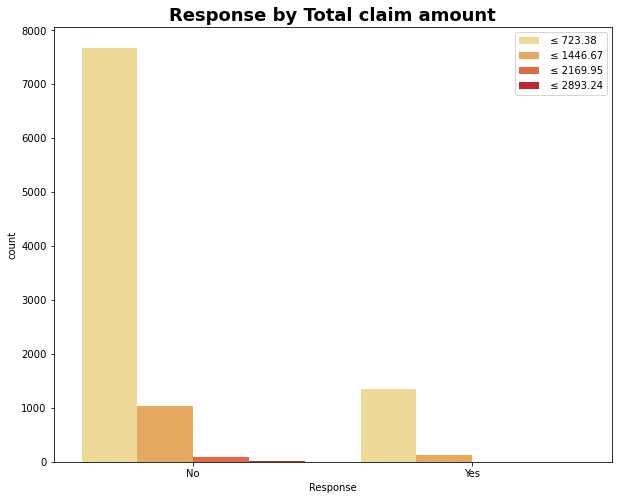

In [7]:
count_plot_w_hue(raw_df, "Response", "Total Claim Amount")  # cat hue num

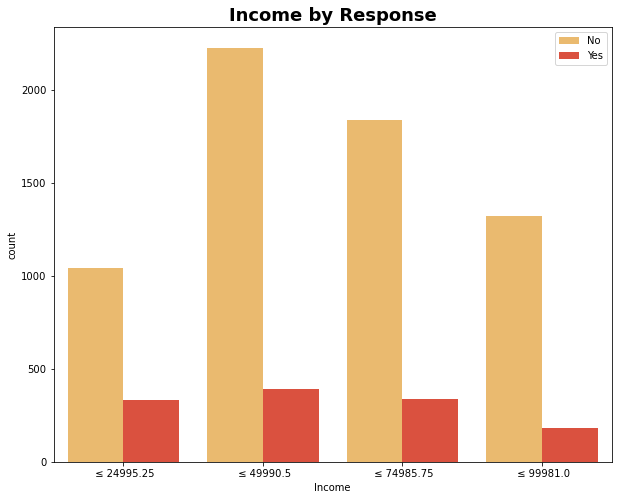

In [8]:
count_plot_w_hue(raw_df, "Income", "Response")              # num hue cat

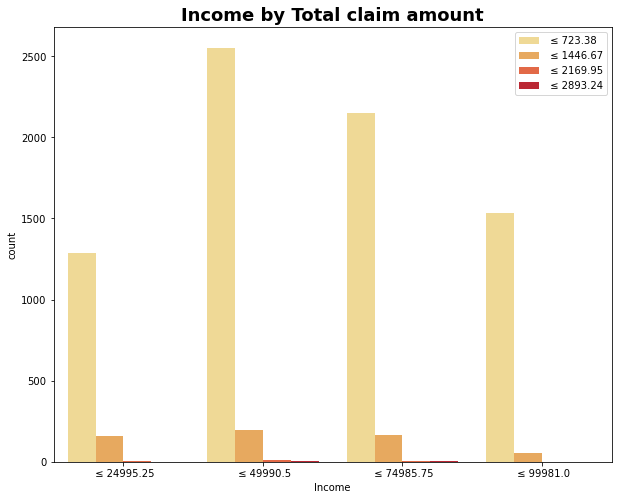

In [9]:
count_plot_w_hue(raw_df, "Income", "Total Claim Amount")    # num hue cat

ValueError:  is not a valid palette name

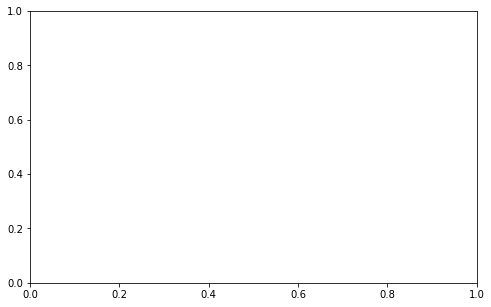

In [11]:
# customize as needed
count_plot_w_hue(raw_df, this_x="Income", this_hue="Sales Channel", figsize=(8,5), 
                 x_bins=8, rotate_xlabels=45, palette="gnuplot", legend_loc="upper left")